In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from flask import Flask, render_template, request, jsonify
import pickle

In [3]:
df = pd.read_csv('spam.csv' , encoding = 'latin-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data cleaning 
df.drop( columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.sample(3)

,v1,v2
3334,ham,"Sorry, got a late start, we're on the way"
3071,ham,Ok lor... But buy wat?
430,ham,At home watching tv lor.


In [11]:
#rename 
df.rename(columns = {'v1' :'target','v2':'text'}, inplace = True)

In [12]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target']=encoder.fit_transform(df['target'])

In [15]:
df   #0 = ham , 1 = spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ï¿½_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
# check missing value 

df.isna().sum()

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.drop_duplicates(keep = 'first' , inplace = True)

# EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     647
Name: count, dtype: int64

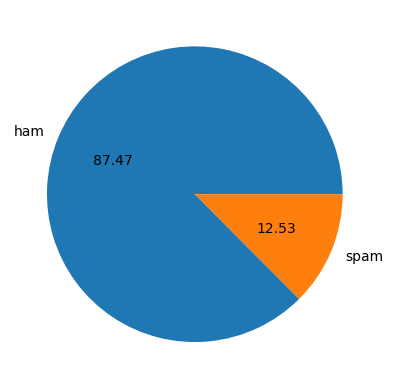

In [22]:
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sreet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_character']=df['text'].apply(len)
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,162
5568,0,Will ï¿½_ b going to esplanade fr home?,39
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [25]:
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [26]:
df

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,162,35,4
5568,0,Will ï¿½_ b going to esplanade fr home?,39,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,5163.000000,5163.000000,5163.000000
mean,79.117761,18.443153,1.963006
std,58.315931,13.327064,1.446712
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.655890,17.123782,1.820195
std,56.434262,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,647.000000,647.000000,647.000000
mean,138.180835,27.652241,2.959815
std,30.343387,7.034937,1.485198
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


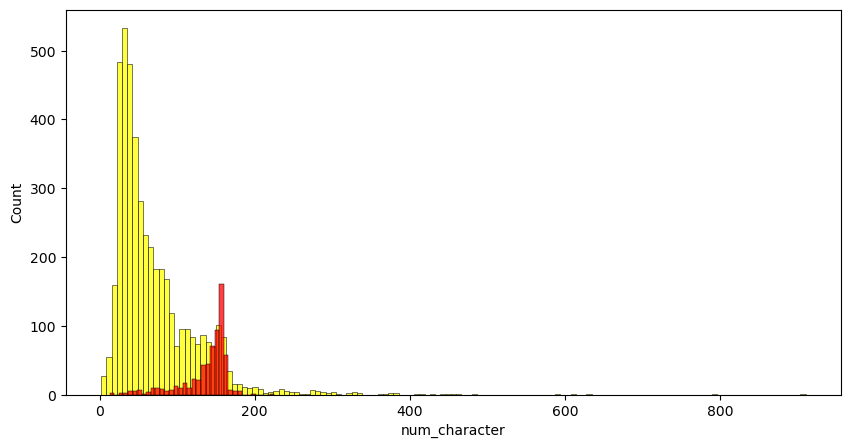

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_character'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

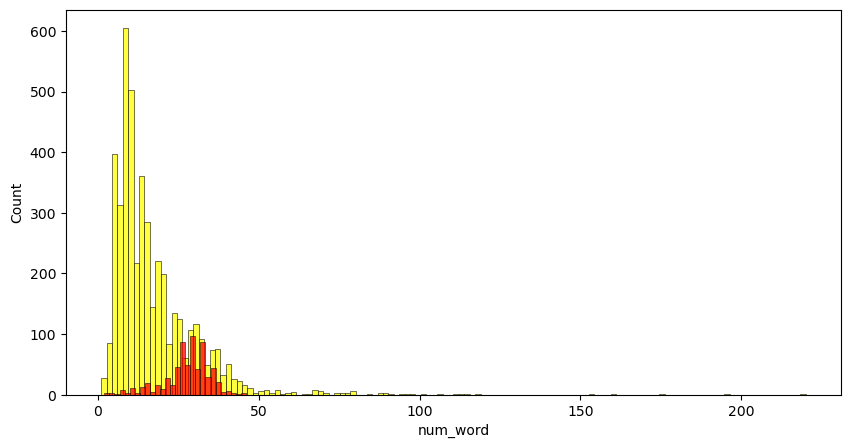

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


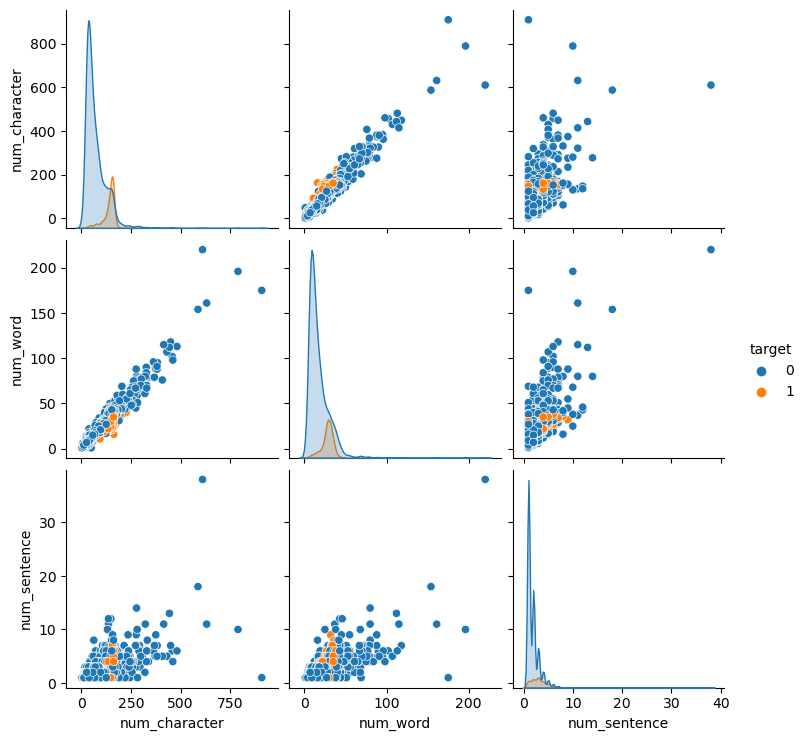

In [32]:
sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

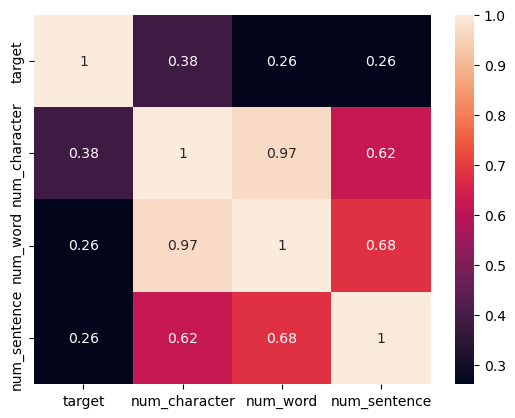

In [33]:
#to see correlation matrix 
df_numeric = df.select_dtypes(include=[np.number]) 
sns.heatmap(df_numeric.corr() , annot = True)

In [37]:
from nltk.corpus import stopwords

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
            
    text = y[:]       
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [41]:
transform_text('HI Sree MY Soul  AI?!')

'hi sree soul ai'

In [42]:
ps.stem('danceing')

'danc'

In [44]:
df['transform_text']=df['text'].apply(transform_text)
df

,target,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,162,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ï¿½_ b going to esplanade fr home?,39,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# Model Building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [50]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [51]:
X.shape

(5163, 6675)

In [52]:
y = df['target'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 2 )

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score 
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8635043562439496
[[786 126]
 [ 15 106]]
0.45689655172413796


In [57]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593417231364957
[[912   0]
 [ 42  79]]
1.0


In [58]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9690222652468539
[[908   4]
 [ 28  93]]
0.9587628865979382


In [68]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [70]:
df['transform_text'][5567]

'2nd time tri 2 contact u pound prize 2 claim easi call 087187272008 now1 10p per minut'

In [73]:
df.sample(6)

,target,text,num_character,num_word,num_sentence,transform_text
78,0,Does not operate after &lt;#&gt; or what,42,13,1,oper lt gt
871,0,Its going good...no problem..but still need li...,102,18,1,go good problem still need littl experi unders...
2709,0,Sorry de i went to shop.,24,7,1,sorri de went shop
1056,0,Then u drive lor.,17,5,1,u drive lor
144,0,Yes see ya not on the dot,25,7,1,ye see ya dot
3862,1,Oh my god! I've found your number again! I'm s...,108,27,3,oh god found number glad text back xafter msg ...
